## BeautifulSoup 파서 종류

- "html.parser" : 빠르지만 유연하지 않기 때문에 단순한 HTML문서에 사용합니다.
- "lxml" : 매우 빠르고 유연합니다.
- "xml" : XML 파일에만 사용합니다.
- "html5lib" : 복잡한 구조의 HTML에 대해서 사용합니다.

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bs = BeautifulSoup(html, 'html.parser')
print(bs)

<html>
<head>
<style>
.green{
	color:#55ff55;
}
.red{
	color:#ff5555;
}
#text{
	width:50%;
}
</style>
</head>
<body>
<h1>War and Peace</h1>
<h2>Chapter 1</h2>
<div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p></p>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
of high rank and importance, who was the firs

In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bs = BeautifulSoup(html, "html.parser")

In [6]:
# 패턴 : <span class="green">Anna Pavlovna</span>
nameList = bs.findAll('span', {'class': 'green'})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


In [7]:
# 패턴 : <h1>War and Peace</h1><h2>Chapter 1</h2> => return a list of all the header tags
titles = bs.find_all(['h1', 'h2','h3','h4','h5','h6'])
print([title for title in titles])

[<h1>War and Peace</h1>, <h2>Chapter 1</h2>]


In [8]:
# 패턴 <span class="green"> or <span class="red"> => return both the green and red span tags
allText = bs.find_all('span', {'class':{'green', 'red'}})
print([text for text in allText])

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>, <span class="green">Anna
Pavlovna Scherer</span>, <span class="green">Empress Marya
Fedorovna</span>, <span class="green">Prince Vasili Kuragin</span>, <span class="green">Anna Pavlovna</span>, <span class="green">St. Petersburg</span>, <span class="red">If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.</span>, <span class="red">Heavens! w

In [9]:
# 패턴: <span class="green">the prince</span> => find the number of times “the prince” is surrounded by tags 
nameList = bs.find_all(text='the prince')
for name in nameList:
    print(name)
print(len(nameList))

the prince
the prince
the prince
the prince
the prince
the prince
the prince
7


In [10]:
# 패턴 => returns the first tag with the word “text” in the class_ attribute and “title” in the id attribute
title = bs.find_all(id='title', class_='text')
print([text for text in title])

#for text in title:
#    print(text)

[]


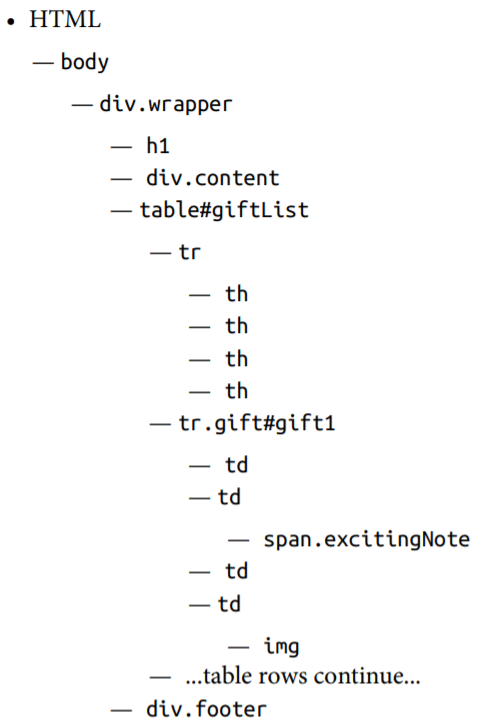

In [11]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

# 패턴 <table id="giftList"> => print all rows of products from the product table, except for the first title row
for child in bs.find('table',{'id':'giftList'}).children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


In [12]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

# 패턴 => print all rows of products from the product table, except for the first title row
for sibling in bs.find('table', {'id':'giftList'}).tr.next_siblings:
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

In [13]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

# 패턴 <td>$15.00</td><td><img src="../img/gifts/img1.jpg"></td>
# =>  print the price of the object represented by the image at the location ../img/gifts/img1.jpg (in this case, the price is $15.00).
img = bs.find('img', {'src':'../img/gifts/img1.jpg'})
print(img.parent.previous_sibling.get_text())


$15.00



In [14]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

# [정규표현식] Dot(.) 메타 문자는 줄바꿈 문자인 \n을 제외한 모든 문자와 매치 ex) a.b == "a + 모든문자 + b"
# [정규표현식] 반복 (*)
# 패턴 <img src="../img/gifts/img1.jpg"> => print only the relative image paths that start with ../img/gifts/img and end in .jpg
images = bs.find_all('img', {'src':re.compile('\.\.\/img\/gifts/img.*\.jpg')})
for image in images: 
    print(image['src'])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


In [15]:
# 패턴 <img src="../img/gifts/logo.jpg" style="float:left;"/> => retrieves all tags that have exactly two attributes:
bs.find_all(lambda tag: len(tag.attrs) == 2)

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td>

In [16]:
bs.find_all(lambda tag: tag.get_text() == 'Or maybe he\'s only resting?')

[<span class="excitingNote">Or maybe he's only resting?</span>]

In [17]:
bs.find_all('', text='Or maybe he\'s only resting?')

["Or maybe he's only resting?"]